# Install depedencies and importing

In [1]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch.nn import Linear
import torch.nn.functional as F
import os
import random
import numpy as np
import json
import tqdm
import networkx as nx
from collections import defaultdict
from time import time



In [2]:
# fix seed to ensure consistent results
seed_value = 1
random.seed(seed_value)        # seed python RNG
np.random.seed(seed_value)     # seed global NumPy RNG
torch.manual_seed(seed_value)  # seed torch RNG

# Set GPU/CPU
TORCH_DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
TORCH_DTYPE = torch.float64
print(f'Will use device: {TORCH_DEVICE}, torch dtype: {TORCH_DTYPE}')


Will use device: cuda, torch dtype: torch.float64


In [3]:
# 0 1 -2
# 0 2 -4
# 1 2 2
# 1 3 -1
# 2 3 -6
# 3 4 3
# 4 5 4
# 4 6 4
# 5 6 -1
# 6 7 3
# 6 8 3
# 7 8 -1
# 7 9 3
# 8 9 2	
fastHare_data = {}
fastHare_data['H'] = {i:0 for i in range(10)}
fastHare_data['edges'] = {'0':[0,1],
                          '1':[0,2],
                          '2':[1,2],
                          '3':[1,3],
                          '4':[2,3],
                          '5':[3,4],
                          '6':[4,5],
                          '7':[4,6],
                          '8':[5,6],
                          '9':[6,7],
                          '10':[6,8],
                          '11':[7,8],
                          '12':[7,9],
                          '13':[8,9]}
fastHare_data['J'] =     {'0':-2,
                          '1':-4,
                          '2':2,
                          '3':-1,
                          '4':-6,
                          '5':3,
                          '6':4,
                          '7':4,
                          '8':-1,
                          '9':3,
                          '10':3,
                          '11':-1,
                          '12':3,
                          '13':2}
fastHare_data['label'] = [1, -1, -1, 1, 1, 1, 1, 1, 1, 1]

In [4]:
# from torch._C import FileCheck
# DIR = '/content/drive/MyDrive/erdos_renyi'
# graph_data = []
# for file in tqdm.tqdm(os.listdir(DIR)):
#   if 'graph' not in file:
#     continue
#   path = DIR+'/'+file
#   f = open(path)
#   fastHare_data = json.load(f)
#   src = []
#   dst = []
#   for v in fastHare_data['edges'].values():
#     src.append(v[0])
#     dst.append(v[1])
#   virtual_idx = len(fastHare_data['H'])
#   src.extend([int(i) for i in fastHare_data['H'].keys()])
#   dst.extend([virtual_idx for _ in range(len(fastHare_data['H']))])
#   src.extend([virtual_idx for _ in range(len(fastHare_data['H']))])
#   dst.extend([int(i) for i in fastHare_data['H'].keys()])

#   edge_index = torch.tensor([src,dst], dtype=torch.long)
#   edge_attr = [v for v in fastHare_data['J'].values()]
#   edge_attr.extend(list(fastHare_data['H'].values()))
#   edge_attr.extend(list(fastHare_data['H'].values()))
#   edge_attr = F.normalize(torch.tensor(edge_attr, dtype=torch.float),dim=-1).unsqueeze(dim=-1)

#   # x = F.normalize(torch.tensor([v for v in data['H'].values()], dtype=torch.float),dim=-1).unsqueeze(dim=-1)
#   y = torch.tensor([0 if v==-1 else v for v in fastHare_data['label']], dtype=torch.long)
#   # graph_data.append(Data(x=x, edge_index=edge_index, y=y, edge_attr=edge_attr))
#   break

In [5]:
src = []
dst = []
for v in fastHare_data['edges'].values():
  src.append(v[0])
  dst.append(v[1])
for v in fastHare_data['edges'].values():
  src.append(v[1])
  dst.append(v[0])

# virtual_idx = len(fastHare_data['H'])
# src.extend([int(i) for i in fastHare_data['H'].keys()])
# dst.extend([virtual_idx for _ in range(len(fastHare_data['H']))])
# src.extend([virtual_idx for _ in range(len(fastHare_data['H']))])
# dst.extend([int(i) for i in fastHare_data['H'].keys()])

edge_index = torch.tensor([src,dst], dtype=torch.long)
edge_attr = [v for v in fastHare_data['J'].values()]
edge_attr.extend(list(fastHare_data['J'].values()))

# edge_attr.extend(list(fastHare_data['H'].values()))
# edge_attr.extend(list(fastHare_data['H'].values()))
edge_attr = torch.tensor(edge_attr, dtype=TORCH_DTYPE)
# edge_attr = F.normalize(torch.tensor(edge_attr, dtype=torch.float),dim=-1).unsqueeze(dim=-1)

# x = F.normalize(torch.tensor([v for v in data['H'].values()], dtype=torch.float),dim=-1).unsqueeze(dim=-1)
y = torch.tensor([0 if v==-1 else v for v in fastHare_data['label']], dtype=torch.long)


In [6]:
# x = [1 for _ in range(virtual_idx+1)]
# mask = [True for _ in range(virtual_idx+1)]
x = [1 for _ in range(len(fastHare_data['H']))]
mask = [True for _ in range(len(fastHare_data['H']))]

mask[-1] = False
x = torch.tensor(x, dtype=TORCH_DTYPE)
mask = torch.tensor(mask)
data = Data(x=x, edge_index=edge_index, y=y,edge_attr=edge_attr, test_mask=mask)

In [7]:
# print(len(graph_data))
# num_train_obs = 4500
# train_loader = DataLoader(graph_data[:num_train_obs], batch_size=2)
# test_loader = DataLoader(graph_data[num_train_obs:], batch_size=1)

# Test with FastHare

In [ ]:
! pip install dwave-ocean-sdk gravis 


In [15]:
# ! git clone "https://github.com/thang-dinh/FastHare.git"
# Move into the FastHare folder
%cd ../FastHare
# Install the FastHare module


/home/tuannmd/FastHare


In [9]:
J = {}
for k in fastHare_data['edges'].keys():
  edge = (fastHare_data['edges'][k][0],fastHare_data['edges'][k][1])
  weight =  fastHare_data['J'][k]
  J[edge]=weight
h = {int(k):1 for k,v in fastHare_data['H'].items()}


In [10]:
import neal

# Solve the Ising using simulated annealing (SA)
sa = neal.SimulatedAnnealingSampler()
sample_set_sa = sa.sample_ising(h, J, num_reads = 10000)
print(sample_set_sa.aggregate() )
print("Best solution has a minimum energy ", sample_set_sa.first.energy)

   0  1  2  3  4  5  6  7  8  9 energy num_oc.
1 -1 -1 -1 -1 +1 -1 -1 +1 +1 -1  -39.0    8712
3 -1 -1 -1 -1 -1 +1 +1 -1 -1 +1  -33.0     587
0 +1 +1 +1 +1 -1 +1 +1 -1 -1 +1  -31.0     349
2 +1 -1 +1 +1 -1 +1 +1 -1 -1 +1  -31.0     352
['SPIN', 4 rows, 10000 samples, 10 variables]
Best solution has a minimum energy  -39.0


In [16]:
from FastHareComposite import FastHareComposite

# Use FastHare composite to preprocess instance before sovling
# Solve the Ising using simulated annealing (SA)
fh_sa = FastHareComposite(sa)
sample_set_fh = fh_sa.sample_ising(h, J, num_reads = 10000)
print(sample_set_fh.aggregate())
print("Best solution has a minimum energy ", sample_set_fh.first.energy)
# Display the best solution for SA. Blue spins/nodes: -1, Yellow spins/nodes: +1
# hg.draw(display_method = "notebook", html_file ="fasthare.html",sample = sample_set_fh.first.sample)

FastHare: Reduced 100% variables. Exact solution found.
   0  1  2  3  4  5  6  7  8  9 energy num_oc.
0 -1 -1 -1 -1 +1 -1 -1 +1 +1 -1  -39.0       1
['SPIN', 1 rows, 1 samples, 10 variables]
Best solution has a minimum energy  -39.0


In [17]:
import fasthare as m
print("Using list of triples i, j, h_ij")
# sk_ising = [(0, 1, -3)] # SK Hamiltonian: min - (-3 * x_0  * x_1 )
print(m.fasthare_reduction(sk_ising,alpha=0.2) )
rh, map, sign, time1 = m.fasthare_reduction(sk_ising,alpha=0.2)

# Or using the exp3.net in the "tests" folder
# print("Reading triples i, j, h_ij from file")
# rh, map, sign, time1 = m.fasthare_reduction(file ="exp3.net",alpha=0.2)
print(rh) 
print(map)
print(sign)
print(time1)


Using list of triples i, j, h_ij


NameError: name 'sk_ising' is not defined

In [21]:
fastHare_data['adj_label'] = []
for i in range(len(map)):
  for j in range(len(map)):
    if map[i]!=map[j] or i==j:
      fastHare_data['adj_label'].append(0)
    else:
      fastHare_data['adj_label'].append(1)
fastHare_data['adj_label'] = torch.tensor(fastHare_data['adj_label'], dtype=torch.float64)

TypeError: object of type 'type' has no len()

In [19]:
import fasthare as m

def Create_adj_label(J):
    sk_ising = []
    for k,v in J.items():
        sk_ising.append((k[0],k[1],v))
    rh, map, sign, time1 = m.fasthare_reduction(sk_ising,alpha=0.2)
    adj_label = []
    for i in range(len(map)):
        for j in range(len(map)):
            if map[i]!=map[j] or i==j:
                adj_label.append(0)
            else:
                adj_label.append(1)
    return torch.tensor(adj_label, dtype=torch.float64)


In [20]:
from torch._C import FileCheck

DIR = '/erdos_renyi'
graph_data = []
for file in tqdm.tqdm(os.listdir(DIR)):
  if 'graph' not in file:
    continue
  path = DIR+'/'+file
  f = open(path)
  fastHare_data = json.load(f)
  src = []
  dst = []
  for v in fastHare_data['edges'].values():
    src.append(v[0])
    dst.append(v[1])
#   virtual_idx = len(fastHare_data['H'])
#   src.extend([int(i) for i in fastHare_data['H'].keys()])
#   dst.extend([virtual_idx for _ in range(len(fastHare_data['H']))])
#   src.extend([virtual_idx for _ in range(len(fastHare_data['H']))])
#   dst.extend([int(i) for i in fastHare_data['H'].keys()])

  edge_index = torch.tensor([src,dst], dtype=torch.long)
  edge_attr = [v for v in fastHare_data['J'].values()]
#   edge_attr.extend(list(fastHare_data['H'].values()))
#   edge_attr.extend(list(fastHare_data['H'].values()))
  # edge_attr = F.normalize(torch.tensor(edge_attr, dtype=torch.float),dim=-1).unsqueeze(dim=-1)

  # x = F.normalize(torch.tensor([v for v in data['H'].values()], dtype=torch.float),dim=-1).unsqueeze(dim=-1)
  y = torch.tensor([0 if v==-1 else v for v in fastHare_data['label']], dtype=torch.long)
  adj_label = Create_adj_label(fastHare_data['J'])
  graph_data.append(Data(x=x, edge_index=edge_index, y=y, edge_attr=edge_attr, adj_label=adj_label))
  break

FileNotFoundError: [Errno 2] No such file or directory: '/erdos_renyi'

# Utils

In [83]:
def generate_graph(n, d=None, p=None, graph_type='reg', random_seed=0):
    """
    Helper function to generate a NetworkX random graph of specified type,
    given specified parameters (e.g. d-regular, d=3). Must provide one of
    d or p, d with graph_type='reg', and p with graph_type in ['prob', 'erdos'].

    Input:
        n: Problem size
        d: [Optional] Degree of each node in graph
        p: [Optional] Probability of edge between two nodes
        graph_type: Specifies graph type to generate
        random_seed: Seed value for random generator
    Output:
        nx_graph: NetworkX OrderedGraph of specified type and parameters
    """
    if graph_type == 'reg':
        print(f'Generating d-regular graph with n={n}, d={d}, seed={random_seed}')
        nx_temp = nx.random_regular_graph(d=d, n=n, seed=random_seed)
    elif graph_type == 'prob':
        print(f'Generating p-probabilistic graph with n={n}, p={p}, seed={random_seed}')
        nx_temp = nx.fast_gnp_random_graph(n, p, seed=random_seed)
    elif graph_type == 'erdos':
        print(f'Generating erdos-renyi graph with n={n}, p={p}, seed={random_seed}')
        nx_temp = nx.erdos_renyi_graph(n, p, seed=random_seed)
    else:
        raise NotImplementedError(f'!! Graph type {graph_type} not handled !!')

    # Networkx does not enforce node order by default
    nx_temp = nx.relabel.convert_node_labels_to_integers(nx_temp)
    # Need to pull nx graph into OrderedGraph so training will work properly
    nx_graph = nx.OrderedGraph()
    nx_graph.add_nodes_from(sorted(nx_temp.nodes()))
    nx_graph.add_edges_from(nx_temp.edges)
    return nx_graph


# helper function to convert Q dictionary to torch tensor
def qubo_dict_to_torch(nx_G, Q, torch_dtype=None, torch_device=None):
    """
    Output Q matrix as torch tensor for given Q in dictionary format.

    Input:
        Q: QUBO matrix as defaultdict
        nx_G: graph as networkx object (needed for node lables can vary 0,1,... vs 1,2,... vs a,b,...)
    Output:
        Q: QUBO as torch tensor
    """

    # get number of nodes
    n_nodes = len(nx_G.nodes)

    # get QUBO Q as torch tensor
    Q_mat = torch.zeros(n_nodes, n_nodes)
    for (x_coord, y_coord), val in Q.items():
        Q_mat[x_coord][y_coord] = val

    if torch_dtype is not None:
        Q_mat = Q_mat.type(torch_dtype)

    if torch_device is not None:
        Q_mat = Q_mat.to(torch_device)

    return Q_mat
    
def gen_q_dict_mis(nx_G, penalty=2):
    """
    Helper function to generate QUBO matrix for MIS as minimization problem.
    
    Input:
        nx_G: graph as networkx graph object (assumed to be unweigthed)
    Output:
        Q_dic: QUBO as defaultdict
    """

    # Initialize our Q matrix
    Q_dic = defaultdict(int)

    # Update Q matrix for every edge in the graph
    # all off-diagonal terms get penalty
    for (u, v) in nx_G.edges:
        Q_dic[(u, v)] = penalty

    # all diagonal terms get -1
    for u in nx_G.nodes:
        Q_dic[(u, u)] = -1

    return Q_dic

def gen_fastHare_q_dict(data, penalty=2):
    # Initialize our Q matrix
    Q_dic = defaultdict(int)

    # Update Q matrix for every edge in the graph
    # all off-diagonal terms get penalty
    for idx in range(data.edge_index.size()[1]):
        u = data.edge_index[0][idx]
        v = data.edge_index[1][idx]
        Q_dic[(u, v)] = data.edge_attr[idx]

    # all diagonal terms get -1
    # for u in range(data.x.size()[0]):
    #     Q_dic[(u, u)] = -1

    return Q_dic

def fastHare_qubo_dict_to_torch(data, Q, torch_dtype=None, torch_device=None):
    """
    Output Q matrix as torch tensor for given Q in dictionary format.

    Input:
        Q: QUBO matrix as defaultdict
        nx_G: graph as networkx object (needed for node lables can vary 0,1,... vs 1,2,... vs a,b,...)
    Output:
        Q: QUBO as torch tensor
    """

    # get number of nodes
    n_nodes = data.num_nodes

    # get QUBO Q as torch tensor
    Q_mat = torch.zeros(n_nodes, n_nodes)
    for (x_coord, y_coord), val in Q.items():
        Q_mat[x_coord][y_coord] = val

    if torch_dtype is not None:
        Q_mat = Q_mat.type(torch_dtype)

    if torch_device is not None:
        Q_mat = Q_mat.to(torch_device)

    return Q_mat


## Loss function

In [84]:
def loss_func(probs, Q_mat):
    """
    Function to compute cost value for given probability of spin [prob(+1)] and predefined Q matrix.

    Input:
        probs: Probability of each node belonging to each class, as a vector
        Q_mat: QUBO as torch tensor
    """

    probs_ = torch.unsqueeze(probs, 1)

    # minimize cost = x.T * Q * x
    cost = (probs_.T @ Q_mat @ probs_).squeeze()

    return cost

def FastHare_loss_func(probs, Q_mat, embed=None):
    """
    Function to compute cost value for given probability of spin [prob(+1)] and predefined Q matrix.

    Input:
        probs: Probability of each node belonging to each class, as a vector
        Q_mat: QUBO as torch tensor
    """

    probs_ = torch.unsqueeze(probs, 1)
    # minimize cost = x.T * Q * x
    cost = (-1)*(probs_.T @ Q_mat @ probs_).squeeze()

    embed_norm = embed
    cos = torch.cos(embed_norm).mean(dim=0)
    sin = torch.sin(embed_norm).mean(dim=0)
    R = (cos**2 + sin**2)**0.5
    R = R.mean()

    return cost - R

def FastHare_GumbelMax_loss_func(probs, Q_mat, A=None):
    """
    Function to compute cost value for given probability of spin [prob(+1)] and predefined Q matrix.

    Input:
        probs: Probability of each node belonging to each class, as a vector
        Q_mat: QUBO as torch tensor
    """

    probs_ = torch.unsqueeze(probs, 1)
    # minimize cost = x.T * Q * x
    cost = (-1)*(probs_.T @ Q_mat @ probs_).squeeze()
    Q_top = A.T @ Q_mat @ A
    x_top = A.T @ probs_
    # clustering cost = x'.T * Q' * x'
    cost_top = (-1)*(x_top.T @ Q_top @ x_top).squeeze()

    return cost + 0.1*torch.abs(cost-cost_top)

def FastHare_loss_func_2(probs, Q_mat, adj_probs, adj_label, embed=None):
    """
    Function to compute cost value for given probability of spin [prob(+1)] and predefined Q matrix.

    Input:
        probs: Probability of each node belonging to each class, as a vector
        Q_mat: QUBO as torch tensor
    """
    #adj_classifier loss
    loss = nn.BCELoss()
    adj_loss = loss(adj_probs, adj_label)

    probs_ = torch.unsqueeze(probs, 1)
    # minimize cost = x.T * Q * x
    cost = (-1)*(probs_.T @ Q_mat @ probs_).squeeze()

    embed_norm = embed
    cos = torch.cos(embed_norm).mean(dim=0)
    sin = torch.sin(embed_norm).mean(dim=0)
    R = (cos**2 + sin**2)**0.5
    R = R.mean()

    return cost + adj_loss


# Hyper-Params

In [85]:
# Graph hypers
n = 100
d = 3
p = None
graph_type = 'reg'

# NN learning hypers #
number_epochs = int(1e5)
learning_rate = 1e-3
PROB_THRESHOLD = 0.5

# Early stopping to allow NN to train to near-completion
tol = 1e-4          # loss must change by more than tol, or trigger
patience = 1000    # number early stopping triggers before breaking loop

# Problem size (e.g. graph size)
n = data.num_nodes
# n=100
# Establish dim_embedding and hidden_dim values
dim_embedding = int(np.sqrt(n))    # e.g. 10
# dim_embedding = 10
hidden_dim = int(dim_embedding/2)  # e.g. 5

opt = {
    'lr': learning_rate,
    'dim_embedding': dim_embedding,
    'hidden_dim': hidden_dim,
    'dropout': 0.0,
    'number_classes': 1,
    'prob_threshold': PROB_THRESHOLD,
    'number_epochs': number_epochs,
    'tolerance': tol,
    'patience': patience

}

# Graph Generating

In [86]:
#FASTHARE
q_torch = fastHare_qubo_dict_to_torch(data, gen_fastHare_q_dict(data), torch_dtype=TORCH_DTYPE, torch_device=TORCH_DEVICE)


In [87]:
# # Constructs a random d-regular or p-probabilistic graph
# nx_graph = generate_graph(n=n, d=d, p=p, graph_type=graph_type, random_seed=seed_value)

# # Construct Q matrix for graph
# q_torch = qubo_dict_to_torch(nx_graph, gen_q_dict_mis(nx_graph), torch_dtype=TORCH_DTYPE, torch_device=TORCH_DEVICE)

# src = []
# dst = []
# for (u,v) in nx_graph.edges:
#   src.append(u)
#   dst.append(v)
# data = torch.tensor([src,dst], dtype=torch.long)

# Model

In [108]:
from torch_geometric.nn import GraphConv, GATConv, TransformerConv, SAGEConv, AntiSymmetricConv,GCNConv
from torch_geometric.utils import degree,get_laplacian
import torch_sparse
from torch_scatter import scatter_add
import torch.nn as nn
import torch.nn.functional as F

def train(data, edge_weight=None):
      model.train()
      optimizer.zero_grad()  
      out = model(data.to(TORCH_DEVICE), edge_weight=edge_weight.to(TORCH_DEVICE))
      final_embed = out[1]
      if model_name=='FastHare_AdjCls':
        adj_probs = out[-1]
      out = out[0].squeeze()
      bitstring = (out >= opt['prob_threshold']) * 1
      bitstring[-1] = 1
      # loss = loss_func(out, q_torch)

      #FASTHARE
      bitstring = (2.0*bitstring-1.0)
      if model_name == 'FastHare_GumbelMax':
        loss = FastHare_GumbelMax_loss_func(out, q_torch, A=final_embed)
      elif model_name == 'FastHare_AdjCls':
        loss = FastHare_loss_func_2(out, q_torch, adj_probs, fastHare_data['adj_label'].to(TORCH_DEVICE),  embed=final_embed)
      else:
        loss = FastHare_loss_func(out, q_torch, embed=final_embed)

      loss_ = loss.detach().item()
      # loss.requires_grad = True
      loss.backward()  
      # for name, param in model.named_parameters():
      #   if param.requires_grad:
      #     print(name,param.grad)
      optimizer.step() 
      # print("END")
      if model_name=='FastHare_AdjCls':
        return loss_, bitstring, final_embed, adj_probs
      return loss_, bitstring, final_embed

# def test():
#       model.eval()
#       test_acc = 0
#       for data in test_loader:
#         out = model(data.x.to(TORCH_DEVICE), 
#                     data.edge_index.to(TORCH_DEVICE), 
#                     data.edge_attr.to(TORCH_DEVICE)) 
#         pred = out.argmax(dim=1)  # Use the class with highest probability.
#         test_correct = pred.cpu() == data.y  # Check against ground-truth labels.
#         test_acc += int(test_correct.sum()) / (data.y.size()[0])  # Derive ratio of correct predictions.
#       return test_acc/(len(test_loader))


##GCN

In [109]:
class GCN(torch.nn.Module):
    def __init__(self, embed_channels, hidden_channels, num_nodes, num_classes, dropout):
        super().__init__()
        self.conv1 = GraphConv(embed_channels, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, num_classes)
        self.dropout = dropout
        self.embed = nn.Embedding(num_nodes, embed_channels)

    def forward(self, edge_index, edge_weight=None):
        x = self.embed.weight
        x = self.conv1(x, edge_index, edge_weight)
        x = torch.relu(x)
        x = F.dropout(x, p=self.dropout)
        x = self.conv2(x, edge_index, edge_weight)
        x = torch.sigmoid(x)
        return x, _



##GAT

In [110]:
class GAT(torch.nn.Module):
    def __init__(self, embed_channels, hidden_channels, num_nodes, num_classes, dropout):
        super().__init__()
        # self.lin1 = Linear(num_features, embed_channels)
        self.conv1 = GATConv(embed_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, num_classes)
        # self.lin2 = Linear(hidden_channels, num_classes)
        self.dropout = dropout
        self.embed = nn.Embedding(num_nodes, embed_channels)

    def forward(self, edge_index, edge_weight=None):
        x = self.embed.weight
        # x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = F.dropout(x, p=self.dropout)
        x = self.conv2(x, edge_index)
        # x = self.lin2(x)
        x = torch.sigmoid(x)
        return x, _

##Anti-symmetric


In [111]:
class AntiSymmetric(torch.nn.Module):
    def __init__(self, embed_channels, hidden_channels, num_nodes, num_classes, dropout):
        super().__init__()
        # self.lin1 = Linear(num_features, embed_channels)
        phi = GraphConv(embed_channels, embed_channels)
        self.conv1 = AntiSymmetricConv(embed_channels, phi=phi)
        self.conv2 = AntiSymmetricConv(embed_channels, phi=phi, act='relu')
        self.lin2 = Linear(embed_channels, num_classes)
        self.dropout = dropout
        self.embed = nn.Embedding(num_nodes, embed_channels)

    def forward(self, edge_index, edge_weight=None):
        x = self.embed.weight
        # x = F.dropout(x, p=0.1, training=self.training)
        x = self.conv1(x, edge_index)
        # x = torch.relu(x)
        x = F.dropout(x, p=self.dropout)
        # x = self.conv2(x, edge_index)
        x = self.lin2(x)
        x = torch.sigmoid(x)
        return x


## Custom


In [115]:
class GCN2(torch.nn.Module):
    def __init__(self, embed_channels, hidden_channels, num_nodes, num_classes, dropout):
        super().__init__()
        # self.conv1 = SAGEConv(embed_channels, hidden_channels)
        # self.conv2 = SAGEConv(hidden_channels, num_classes)
        self.lin2 = Linear(embed_channels, num_classes)
        self.dropout = dropout
        self.embed = nn.Embedding(num_nodes, embed_channels)

    def forward(self, edge_index, edge_weight=None):
        x = self.embed.weight

        delta = 0.01
        new_x = x
        orig = new_x.clone()
        K = 1
        lap_edge_index, lap_edge_weight = get_laplacian(edge_index, edge_weight, normalization='rw')
        
        for _ in range(20):
          # ax = torch_sparse.spmm(lap_edge_index, lap_edge_weight, new_x.shape[0], new_x.shape[0], new_x)

          cos_R = torch_sparse.spmm(lap_edge_index, lap_edge_weight, new_x.shape[0], new_x.shape[0], torch.cos(new_x))
          sin_R = torch_sparse.spmm(lap_edge_index, lap_edge_weight, new_x.shape[0], new_x.shape[0], torch.sin(new_x))
          phi = torch_sparse.spmm(lap_edge_index, lap_edge_weight, new_x.shape[0], new_x.shape[0], new_x)
          R = torch.sqrt((torch.cos(new_x)-cos_R)**2 + (torch.sin(new_x)-sin_R)**2) 
          # print(R)
          out_phi = -phi
          out_hat = K*R*torch.sin(out_phi)

          # new_x = new_x + delta*(orig-ax)

          new_x = new_x + delta*(orig + out_hat)

        x = self.lin2(torch.relu(new_x))        
        x = torch.sigmoid(x)
        return x, new_x

class GCN3(torch.nn.Module):
    def __init__(self, embed_channels, hidden_channels, num_nodes, num_classes, dropout, num_cluster):
        super().__init__()
        self.conv1 = GraphConv(embed_channels, hidden_channels)
        self.conv2 = GraphConv(hidden_channels, num_classes)
        self.dropout = dropout
        self.embed = nn.Embedding(num_nodes, embed_channels)
        if num_cluster is not None:
          self.cluster_trans = Linear(embed_channels, num_cluster)

    def forward(self, edge_index, edge_weight=None):
        x = self.embed.weight
        A = F.gumbel_softmax(self.cluster_trans(x))

        x = self.conv1(x, edge_index, edge_weight)
        x = torch.relu(x)
        x = F.dropout(x, p=self.dropout)
        x = self.conv2(x, edge_index, edge_weight)
        x = torch.sigmoid(x)
        return x, A

class GCN4(torch.nn.Module):
    def __init__(self, embed_channels, hidden_channels, num_nodes, num_classes, dropout):
        super().__init__()
        # self.conv1 = SAGEConv(embed_channels, hidden_channels)
        # self.conv2 = SAGEConv(hidden_channels, num_classes)
        self.lin2 = Linear(embed_channels, num_classes)
        self.lin_Q = Linear(embed_channels, hidden_channels)
        self.lin_K = Linear(embed_channels, hidden_channels)

        self.dropout = dropout
        self.embed = nn.Embedding(num_nodes, embed_channels)

    def forward(self, edge_index, edge_weight=None):
        x = self.embed.weight

        #CREATING NEW EDGE_WEIGHT
        x_Q = self.lin_Q(x)
        x_K = self.lin_K(x)
        src = x_Q[edge_index[0, :], :]
        dst_k = x_K[edge_index[1, :], :]

        new_edge_weight = torch.sum(src * dst_k, dim=1)
        # edge_weight = new_edge_weight

        lamb = 0.01
        new_x = x
        lap_edge_index, lap_edge_weight = get_laplacian(edge_index, edge_weight, normalization='rw')
        orig = x.clone()
        for _ in range(2):
          norm_ax = torch_sparse.spmm(lap_edge_index, lap_edge_weight, new_x.shape[0], new_x.shape[0], new_x)
          ax = torch_sparse.spmm(edge_index, edge_weight, new_x.shape[0], new_x.shape[0], new_x)

          new_x = (lamb*orig + (norm_ax-ax))/(1+lamb)


        x = self.lin2(torch.relu(new_x))        
        x = torch.sigmoid(x)
        return x, new_x, torch.flatten(torch.sigmoid(x_Q @ x_K.T))

In [116]:
data

Data(x=[10], edge_index=[2, 28], edge_attr=[28], y=[10], test_mask=[10])

In [117]:
#FASTHARE
model_name = None
model_name = 'FastHare_AdjCls'
opt['cluster_num'] = 3
model = GCN4(embed_channels=opt['dim_embedding'],
            hidden_channels=opt['hidden_dim'],
            num_nodes = data.num_nodes,
            # num_features=1,
            num_classes=opt['number_classes'],
            dropout=opt['dropout']).to(TORCH_DEVICE).to(TORCH_DTYPE)

# #Other
# model = GCN(embed_channels=opt['dim_embedding'],
#             hidden_channels=opt['hidden_dim'],
#             num_nodes = nx_graph.number_of_nodes(),
#             # num_features=1,
#             num_classes=opt['number_classes'],
#             dropout=opt['dropout']).to(TORCH_DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=opt['lr'])

# Start optimizing

In [118]:
prev_loss = 1.  # initial loss value (arbitrary)
count = 0       # track number times early stopping is triggered
best_loss = 0
t_gnn_start = time()

for epoch in range(1, opt['number_epochs']+1):
    if model_name == 'FastHare_AdjCls':
      loss, res, final_embed, adj_cls = train(data.edge_index, edge_weight=data.edge_attr)
    else:
      loss, res, final_embed = train(data.edge_index, edge_weight=data.edge_attr)
    
    if loss < best_loss:
      best_loss = loss
      best_bitstring = res

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}')

    # early stopping check
    # If loss increases or change in loss is too small, trigger
    if (abs(loss - prev_loss) <= opt['tolerance']) | ((loss - prev_loss) > 0):
        count += 1
    else:
        count = 0

    if count >= opt['patience']:
        print(f'Stopping early on epoch {epoch}')
        break

    # update loss tracking
    prev_loss = loss

# print(f'GNN training (n={nx_graph.number_of_nodes()}) took {round(time() - t_gnn_start, 3)}')
print(f'GNN training (n={data.num_nodes}) took {round(time() - t_gnn_start, 3)}')
print(f'GNN final continuous loss: {loss}')
print(f'GNN best continuous loss: {best_loss}')


Epoch: 1000, Loss: -27.374356135605066
Epoch: 2000, Loss: -33.533780920692074
Epoch: 3000, Loss: -36.35850728561338
Epoch: 4000, Loss: -37.672069552057096
Epoch: 5000, Loss: -38.363829190028596
Epoch: 6000, Loss: -38.76254613479027
Epoch: 7000, Loss: -39.0114960587079
Epoch: 8000, Loss: -39.24110095351193
Epoch: 9000, Loss: -39.34621324451025
Stopping early on epoch 9549
GNN training (n=10) took 40.727
GNN final continuous loss: -39.38446860838861
GNN best continuous loss: -39.38446860838861


In [119]:
best_bitstring

tensor([ 1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], device='cuda:0')

In [120]:
final_embed

tensor([[ 3.3573e+00,  3.3108e+01, -1.3398e+01],
        [-9.1934e-04, -1.2298e+00,  6.9007e+00],
        [-1.4826e+01, -3.6732e+00,  8.7073e+01],
        [-4.6099e+00,  5.9958e+01, -5.2828e+01],
        [ 4.5400e+01, -1.2516e+00,  7.6774e+00],
        [-3.8585e+01,  2.4400e+01, -3.5071e+01],
        [-5.5398e+01, -5.9628e+01, -3.1817e+01],
        [ 4.6359e+01,  2.6188e+01,  1.0696e+01],
        [ 4.3720e+01,  2.5091e+01,  1.1379e+01],
        [-2.3941e+01, -7.5462e+01, -1.1299e-01]], device='cuda:0',
       dtype=torch.float64, grad_fn=<DivBackward0>)

In [124]:
((adj_cls>opt['prob_threshold'])*1).view(10,10)

tensor([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], device='cuda:0')

In [127]:
fastHare_data['adj_label'].view(10,10)

tensor([[0., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=torch.float64)

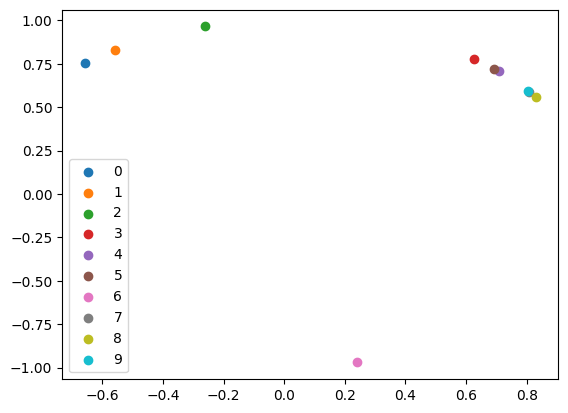

In [ ]:
import matplotlib.pyplot as plt

test_embed = final_embed.mean(dim=-1)
embed_cos = torch.cos(test_embed).cpu().detach().numpy()
embed_sin = torch.sin(test_embed).cpu().detach().numpy()
for i in range(10):
  plt.scatter(embed_cos[i],embed_sin[i], label=i)
  plt.legend()
plt.show()

In [ ]:
embed_norm = final_embed
cos = torch.cos(embed_norm).mean(dim=0)
sin = torch.sin(embed_norm).mean(dim=0)
R = (cos**2+sin**2)**0.5
R

tensor([1.0000, 0.9316, 1.0000], device='cuda:0', dtype=torch.float64,
       grad_fn=<PowBackward0>)

Euclid distance between 0 and 1 is 16.875538156701754
Euclid distance between 0 and 2 is 17.960822040738346
Euclid distance between 0 and 3 is 11.07655994978852
Euclid distance between 0 and 4 is 33.013845604769124
Euclid distance between 0 and 5 is 101.22348626490202
Euclid distance between 0 and 6 is 18.21913612644289
Euclid distance between 0 and 7 is 10.214730704331213
Euclid distance between 0 and 8 is 9.636199879401104
Euclid distance between 0 and 9 is 9.73740639296951
Euclid distance between 1 and 2 is 1.4696808243415524
Euclid distance between 1 and 3 is 17.2589704356666
Euclid distance between 1 and 4 is 39.31626428834976
Euclid distance between 1 and 5 is 101.34827808840359
Euclid distance between 1 and 6 is 19.083189043889355
Euclid distance between 1 and 7 is 7.473803231218487
Euclid distance between 1 and 8 is 7.959553250891856
Euclid distance between 1 and 9 is 8.24163700977871
Euclid distance between 2 and 3 is 18.073150759202868
Euclid distance between 2 and 4 is 39.22

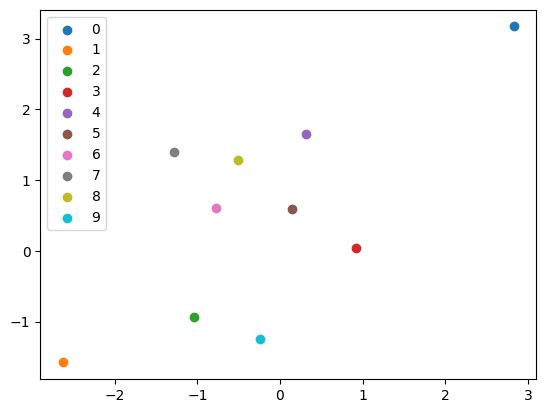

In [107]:
import matplotlib.pyplot as plt
for i in range(10):
  for j in range(i+1,10):
    distance = final_embed[i,:] - final_embed[j,:]
    distance = distance**2
    distance = distance.sum(dim=-1)
    distance = torch.sqrt(distance)
    print(f"Euclid distance between {i} and {j} is {distance}") 
  plt.scatter(model.embed.cpu().weight[i,0].detach().numpy(), model.embed.cpu().weight[i,1].detach().numpy(), label=i)
  plt.legend()

In [ ]:
torch.argmax(final_embed, dim=1)


tensor([0, 0, 1, 1, 2, 2, 0, 1, 1, 1], device='cuda:0')

In [ ]:
final_embed

tensor([[-0.7483, -0.6340,  1.9541],
        [-0.0116, -0.1998, -3.6641],
        [-0.1927, -0.3101, -4.3090],
        [-0.8823, -0.6618,  2.1148],
        [-0.8458, -0.9371,  2.1291],
        [-0.8503, -0.6806,  2.1069],
        [-0.9158, -1.0127,  1.9387],
        [-0.8231, -0.6927,  2.2019],
        [-0.8242, -0.6823,  2.1781],
        [-1.2031, -0.4578,  2.0829],
        [-0.7367, -0.6270,  2.1235]], device='cuda:0', grad_fn=<AddBackward0>)

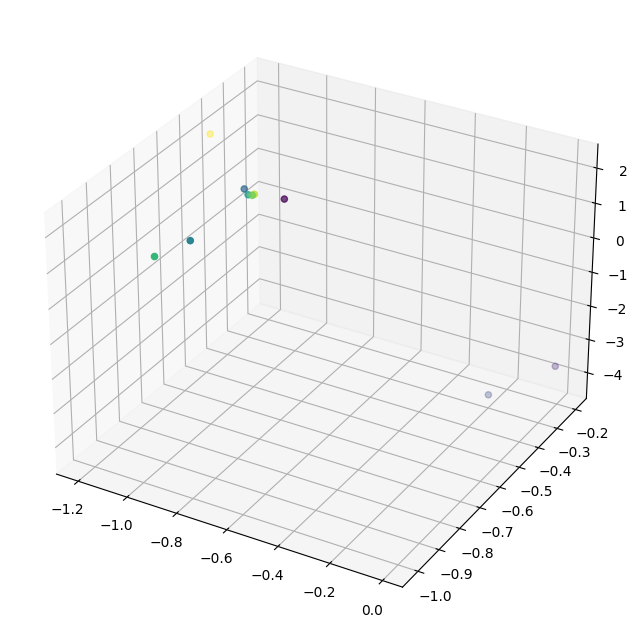

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection='3d')
plot_data = final_embed.cpu().detach().numpy()
ax.scatter(plot_data[:-1,0], plot_data[:-1,1], plot_data[:-1,2], c=[0,1,2,3,4,5,6,7,8,9])
plt.show()

In [ ]:
model.embed.weight[:,0].detach().numpy()

In [ ]:
from itertools import chain, islice, combinations

def gen_combinations(combs, chunk_size):
    yield from iter(lambda: list(islice(combs, chunk_size)), [])

# Calculate results given bitstring and graph definition, includes check for violations
def postprocess_gnn_mis(best_bitstring, nx_graph):
    """
    helper function to postprocess MIS results

    Input:
        best_bitstring: bitstring as torch tensor
    Output:
        size_mis: Size of MIS (int)
        ind_set: MIS (list of integers)
        number_violations: number of violations of ind.set condition
    """

    # get bitstring as list
    bitstring_list = list(best_bitstring)

    # compute cost
    size_mis = sum(bitstring_list)

    # get independent set
    ind_set = set([node for node, entry in enumerate(bitstring_list) if entry == 1])
    edge_set = set(list(nx_graph.edges))

    print('Calculating violations...')
    # check for violations
    number_violations = 0
    for ind_set_chunk in gen_combinations(combinations(ind_set, 2), 100000):
        number_violations += len(set(ind_set_chunk).intersection(edge_set))

    return size_mis, ind_set, number_violations


In [ ]:
final_loss = loss_func(best_bitstring.float(), q_torch)
final_bitstring_str = ','.join([str(x) for x in best_bitstring])

# Process bitstring reported by GNN
size_mis, ind_set, number_violations = postprocess_gnn_mis(best_bitstring, nx_graph)
# gnn_tot_time = time() - gnn_start

print(f'Independence number found by GNN is {size_mis} with {number_violations} violations')
# print(f'Took {round(gnn_tot_time, 3)}s, model training took {round(gnn_time, 3)}s')


In [ ]:
# Visualize result
# Note no light-blue nodes are connected by an edge
pos = nx.kamada_kawai_layout(nx_graph)
# nx.draw_networkx(nx_graph, pos, with_labels=True, node_color=[[.7, .7, .7]])
import matplotlib.pyplot as plt                            # 追加
fig = plt.figure()                                         # 追加 
ax = fig.add_axes([0, 0, 1, 1])                            # 追加

color_map = ['orange' if (best_bitstring[node]==0) else 'lightblue' for node in nx_graph.nodes]
nx.draw(nx_graph, pos, ax=ax, with_labels=True, node_color=color_map)
